In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:39<00:00, 23.2MB/s]
100% 715M/715M [00:39<00:00, 18.9MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [6]:
from zipfile import ZipFile

dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The data is extracted')

The data is extracted


In [7]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.6 MB/s eta 0:00:00


In [9]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
print(len(filenames))

50000


In [13]:
print(filenames[0:5])

['34458.png', '1436.png', '48328.png', '905.png', '12403.png']


In [14]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
values, counts = np.unique(labels_df['label'], return_counts=True)

In [18]:
print(values, counts)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [19]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [20]:
labels_dict = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dict[i] for i in labels_df['label']]

In [21]:
labels[0:5]

[6, 9, 9, 4, 1]

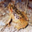

In [22]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

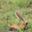

In [23]:
img = cv2.imread('/content/train/4522.png')
cv2_imshow(img)

In [24]:
id_list = list(labels_df['id'])

In [25]:
train_data = '/content/train/'

data = []

for id in id_list:
  img = Image.open(train_data + str(id) + '.png')
  img = np.array(img)

  data.append(img)




In [26]:
len(data)

50000

In [27]:
data[0].shape

(32, 32, 3)

In [28]:
X = np.asarray(data)
Y = np.asarray(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
X.shape

(50000, 32, 32, 3)

In [31]:
Y.shape

(50000,)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [33]:
X_train = X_train/255
X_test = X_test/255

In [34]:
import tensorflow as tf
tf.random.set_seed(3)

from tensorflow import keras

In [35]:
num_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [36]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 9s 3ms/step - loss: 1.9459 - acc: 0.2971
Epoch 2/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8178 - acc: 0.3455
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7711 - acc: 0.3663
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7366 - acc: 0.3816
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7200 - acc: 0.3854
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7052 - acc: 0.3922
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6885 - acc: 0.3986
Epoch 8/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6808 - acc: 0.4018
Epoch 9/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6669 - acc: 0.4051
Epoch 10/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6588 - acc: 0.4064


In [37]:
loss, acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7296 - acc: 0.3915


In [38]:
print(acc)

0.39149999618530273


# Using a pretrained model - ResNet50

In [39]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [40]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [41]:
num_classes = 10

model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


In [42]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [43]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 469s 382ms/step - loss: 1.6957 - acc: 0.4416 - val_loss: 0.8602 - val_acc: 0.7775
Epoch 2/10
1125/1125 [==============================] - 426s 378ms/step - loss: 1.0109 - acc: 0.7042 - val_loss: 0.4914 - val_acc: 0.8875
Epoch 3/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.7399 - acc: 0.8080 - val_loss: 0.4146 - val_acc: 0.8982
Epoch 4/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.5728 - acc: 0.8693 - val_loss: 0.3014 - val_acc: 0.9293
Epoch 5/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.4495 - acc: 0.9052 - val_loss: 0.2513 - val_acc: 0.9410
Epoch 6/10
1125/1125 [==============================] - 426s 379ms/step - loss: 0.3573 - acc: 0.9323 - val_loss: 0.2642 - val_acc: 0.9298
Epoch 7/10
1125/1125 [==============================] - 433s 385ms/step - loss: 0.2835 - acc: 0.9503 - val_loss: 0.2364 - val_acc: 0.9400
Epoch 8/10
1125/1125 [============

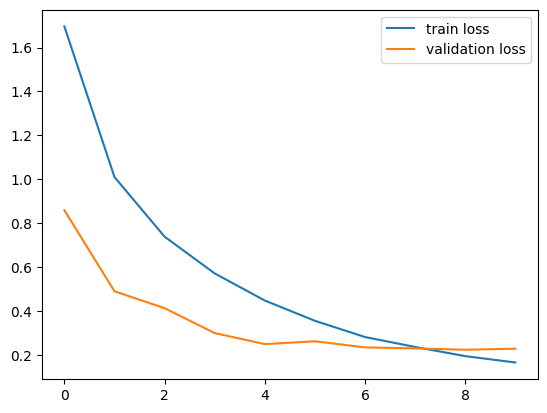

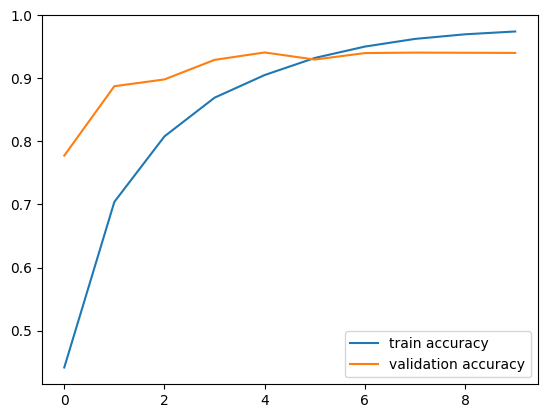

In [44]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()